In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head(5)


,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
df.rename(columns={'R&D Spend':'RDSpend','MarketingSpend':'MS'},inplace=True)


In [26]:
df.isna().sum()

RDSpend           0
Administration    0
MS                0
State             0
Profit            0
dtype: int64

In [27]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
df.corr()

,RDSpend,Administration,MS,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

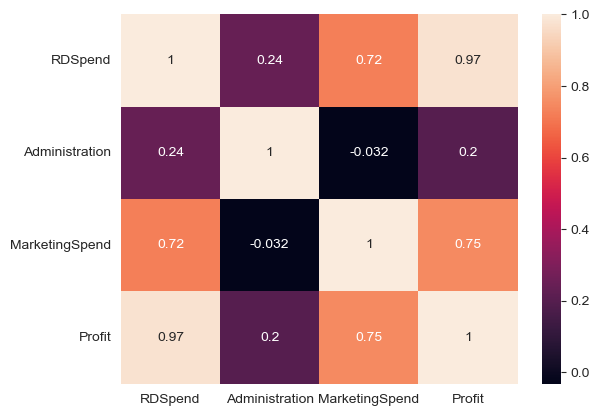

In [20]:
sns.heatmap(df.corr(),annot=True)

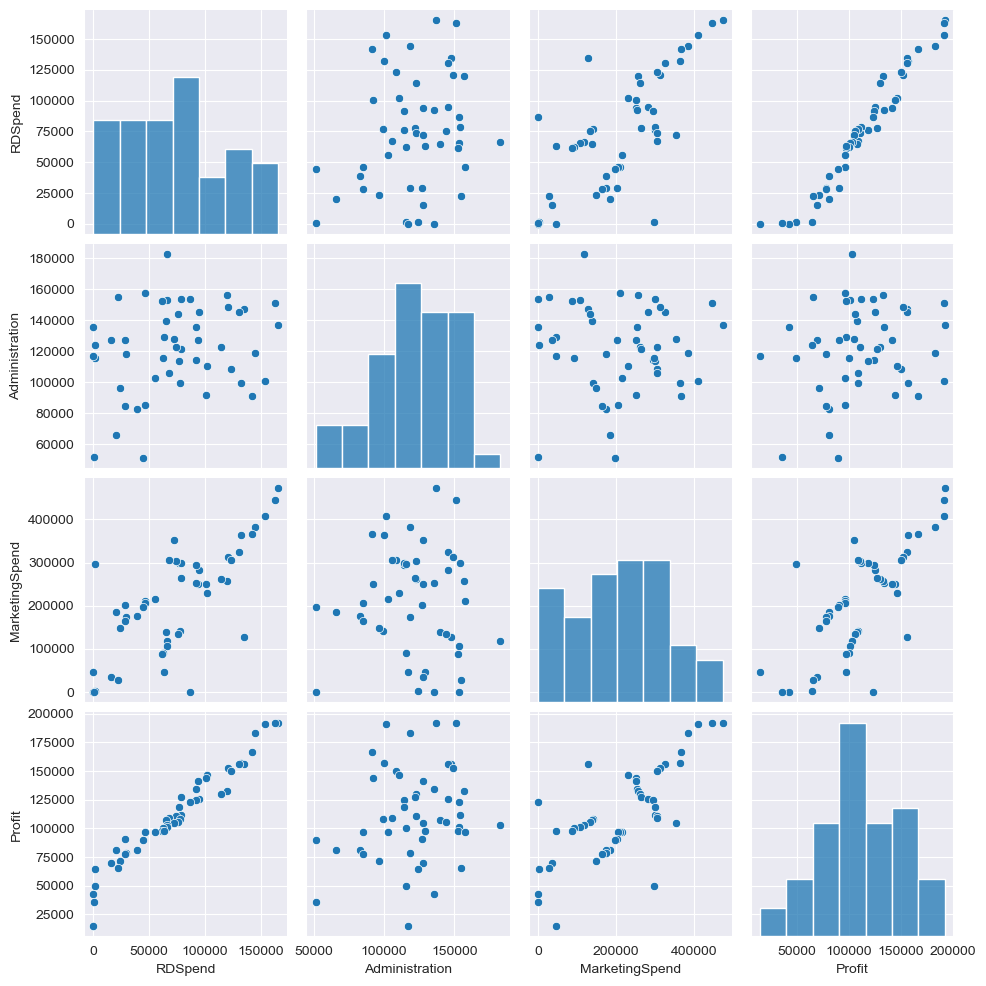

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [29]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDSpend+Administration+MS',data=df).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        14:15:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:

model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [32]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RDSpend           17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RDSpend           2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [33]:

(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [34]:
#calculating vif
rsq_RD = smf.ols('RDSpend~Administration+MS',data=df).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 
vif_RD

2.4689030699947017

In [35]:
rsq_AD = smf.ols('Administration~RDSpend+MS',data=df).fit().rsquared  
vif_AD = 1/(1-rsq_AD) 
vif_AD

1.1750910070550458

In [36]:
rsq_MS = smf.ols('MS~Administration+RDSpend',data=df).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 
vif_MS

2.3267732905308773

In [37]:
d2 = {'Variables':['RDSpend','Administration','MS'],'VIF':[vif_RD,vif_AD,vif_MS]}
vif_frame = pd.DataFrame(d2)
vif_frame

,Variables,VIF
0,RDSpend,2.468903
1,Administration,1.175091
2,MS,2.326773


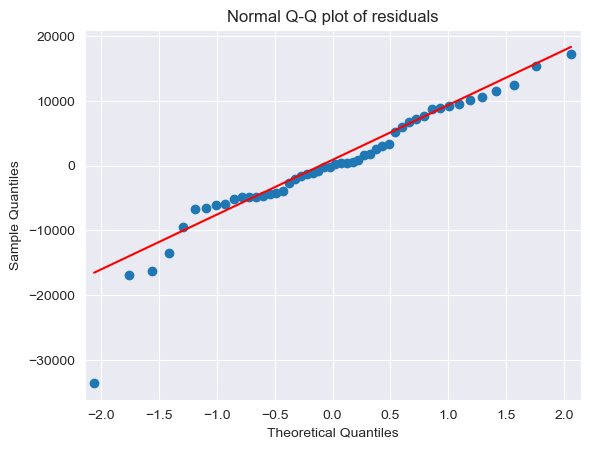

In [38]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

eval_env: 1


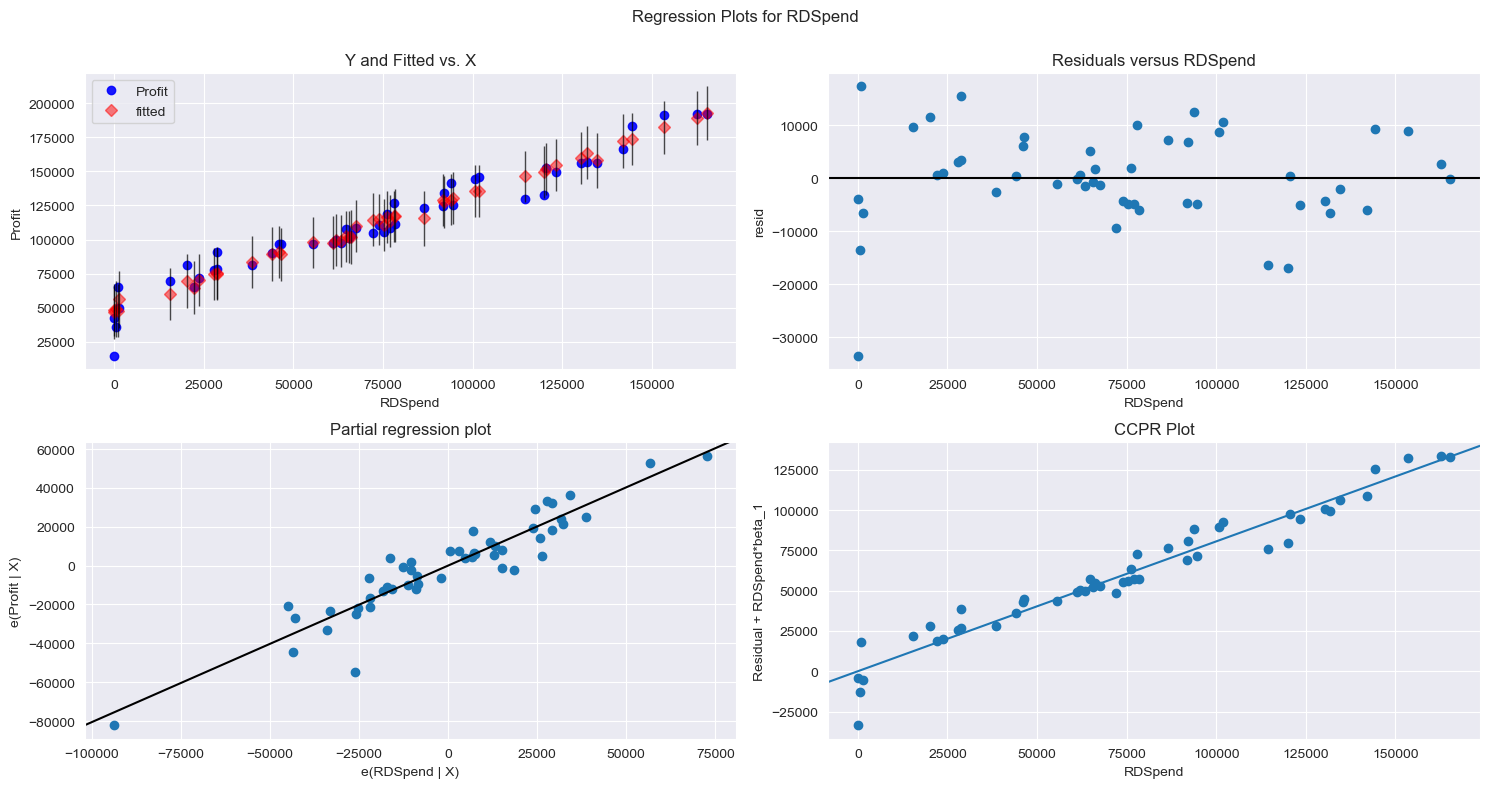

In [39]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

eval_env: 1


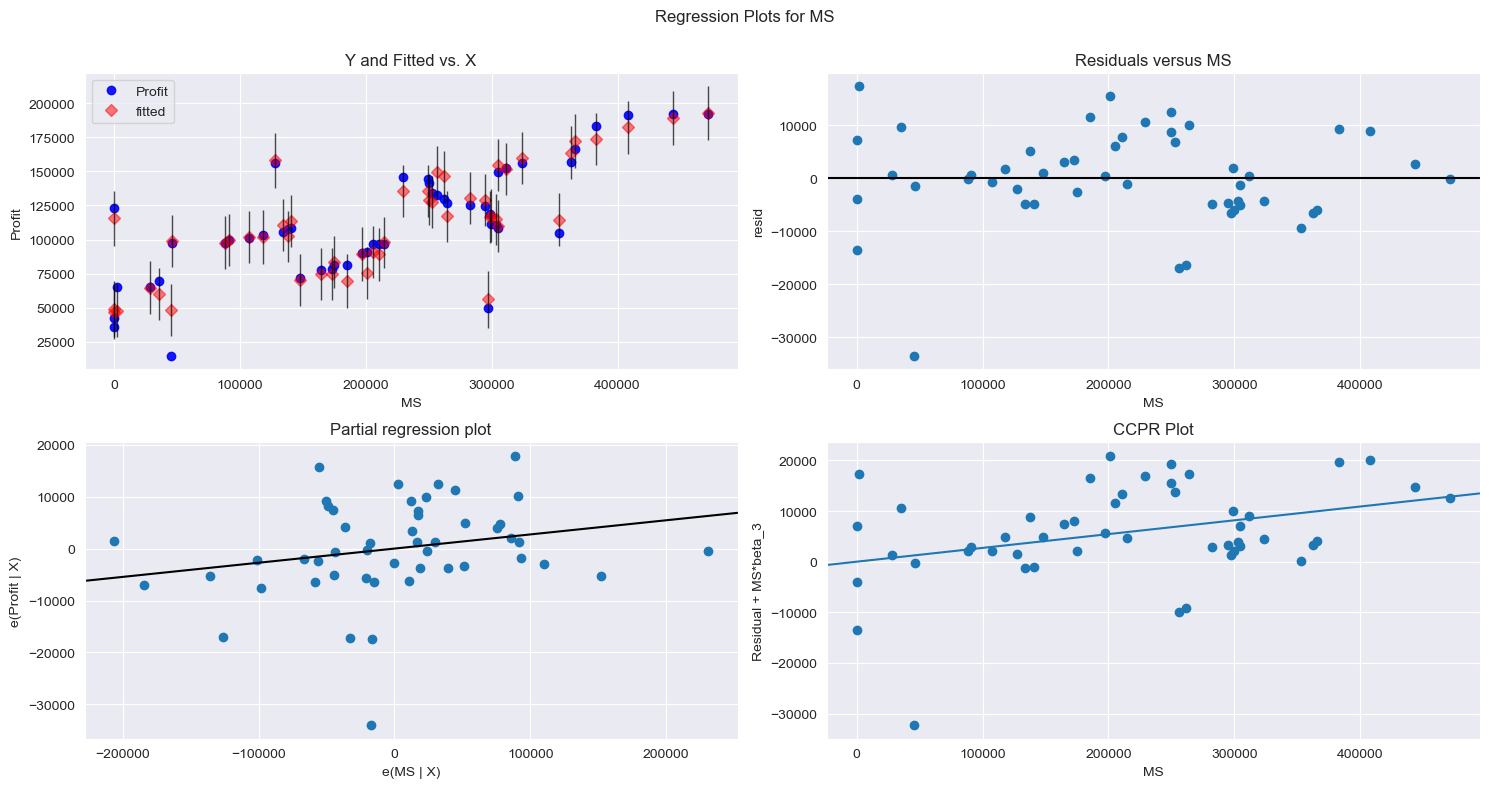

In [40]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

eval_env: 1


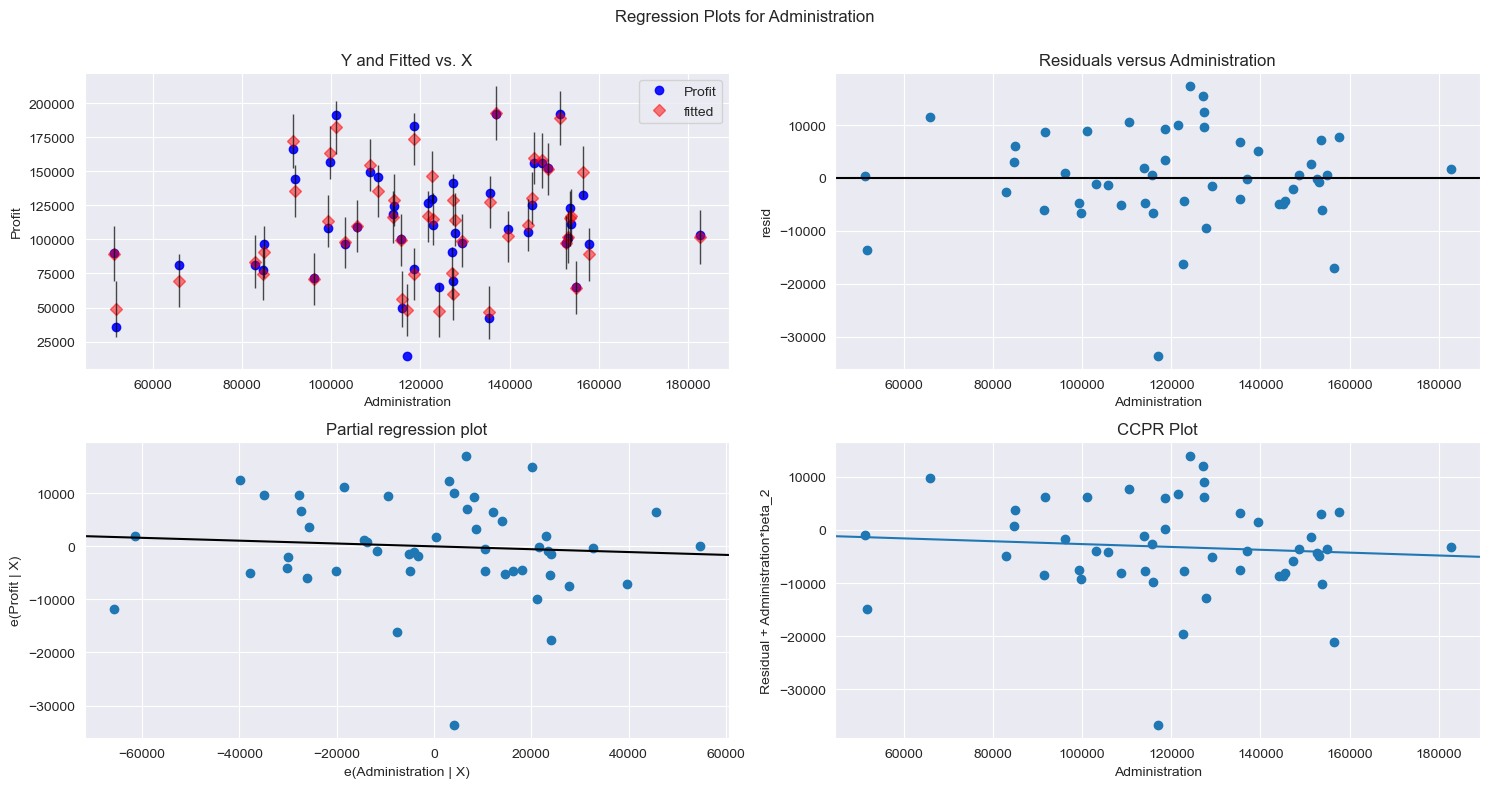

In [41]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [42]:

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

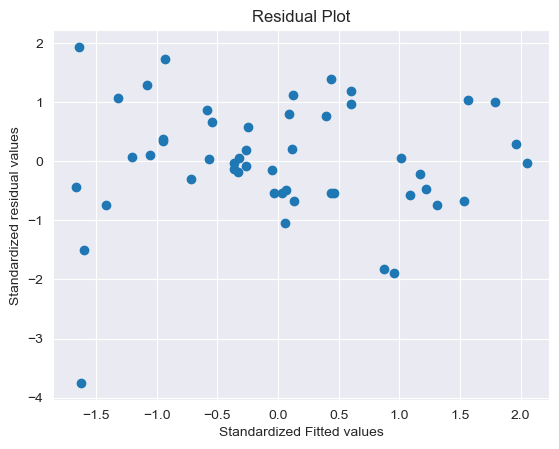

In [43]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [44]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        14:17:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:

model_influence = model.get_influence()
(t, _) = model_influence.cooks_distance

In [46]:
k=3
N=50
3*(k+1)/N

0.24

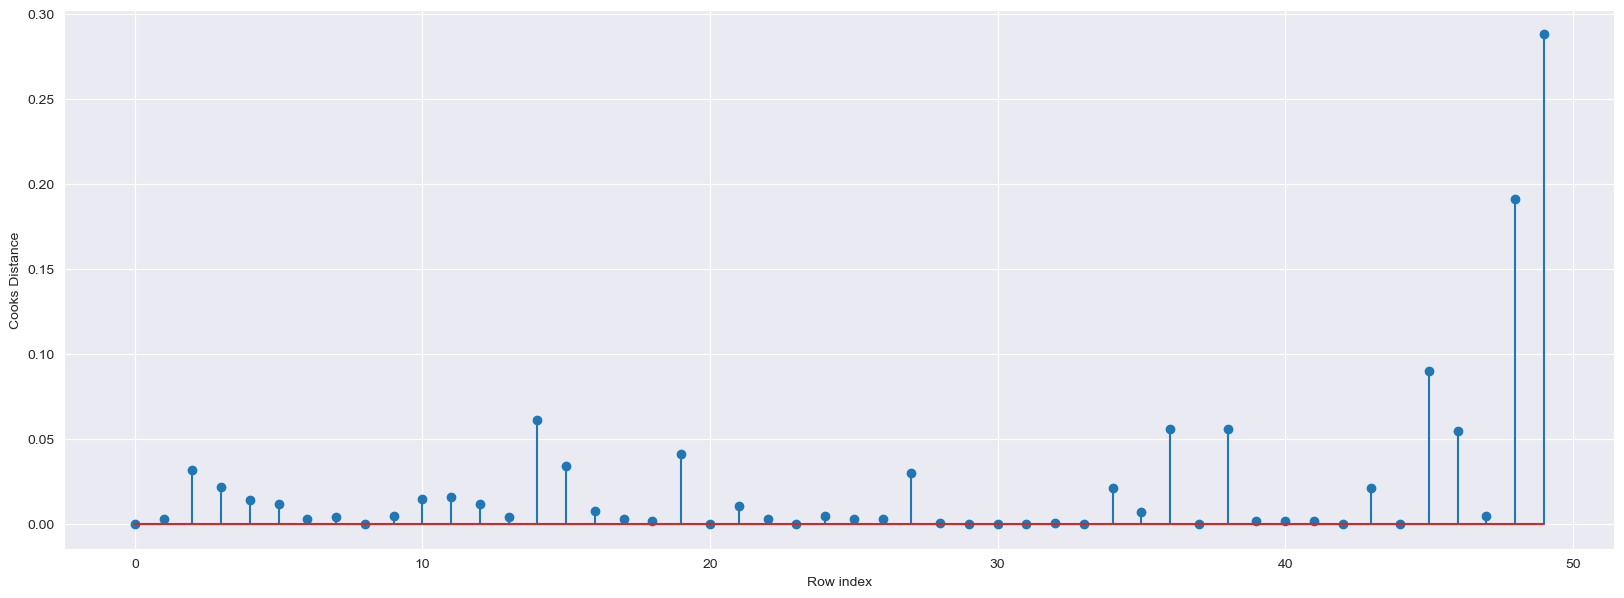

In [47]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(t, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
(np.argmax(t),np.max(t))

(49, 0.28808229275432634)

In [49]:
np.where(t>0.24)

(array([49], dtype=int64),)

In [50]:
df1=df.drop(df.index[[49]],axis=0).reset_index()

In [51]:
df1=df1.drop(['index'],axis=1)

In [52]:

df1.head()

,RDSpend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:

final_df=smf.ols('Profit~RDSpend+Administration+MS',data=df1).fit()

In [54]:

(final_df.rsquared,final_df.aic)

(0.9613162435129847, 1020.5652974526367)

In [55]:

final_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        14:19:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDSpend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS                 0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""